In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
pd.set_option('display.max_columns', None)

import torch
from torch import nn
import torch.nn.functional as F

import ml.losses as mll
import ml.models as mlm
import ml.models_cv as mlcv

#### Classification dataset

In [15]:
X, y = datasets.make_classification(n_samples=2000, n_features=20, n_informative=4, n_classes=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
n_sample, n_feature = X_train.shape
out_dim = 5

In [5]:
# dataset = datasets.fetch_openml('iris')  ## ASP-POTASSCO-classification / iris
dataset = datasets.load_digits()

X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
n_sample, n_feature = X_train.shape
out_dim = 10

In [7]:
optim = {
    'SGD': {'rho': 0.9},
    'RMSProp': {'decay_rate': 0.99, 'epsilon': 1e-8},
    'Adam': {'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-8}
}

In [77]:
rule = 'RMSProp'
model = mlm.ThreeLayerNet(n_feature, [40, 20], out_dim, optim_rule=rule, config=optim[rule], is_bn=True)

In [78]:
training_loss, train_acc, val_acc = model.fit(X_train, y_train, X_test, y_test, mll.SoftmaxCrossEntropy(), lr=0.01, reg=0.3, n_iter=500, n=20)

Iteration 0: loss 29171.82, training acc 0.15, val acc 0.10
Iteration 20: loss 23231.30, training acc 0.49, val acc 0.52
Iteration 40: loss 18353.47, training acc 0.72, val acc 0.68
Iteration 60: loss 14515.04, training acc 0.81, val acc 0.78
Iteration 80: loss 11487.92, training acc 0.88, val acc 0.86
Iteration 100: loss 9100.42, training acc 0.92, val acc 0.88
Iteration 120: loss 7209.36, training acc 0.94, val acc 0.91
Iteration 140: loss 5719.23, training acc 0.95, val acc 0.91
Iteration 160: loss 4544.68, training acc 0.96, val acc 0.92
Iteration 180: loss 3618.72, training acc 0.98, val acc 0.94
Iteration 200: loss 2889.20, training acc 0.98, val acc 0.95
Iteration 220: loss 2313.92, training acc 0.99, val acc 0.96
Iteration 240: loss 1861.80, training acc 0.99, val acc 0.96
Iteration 260: loss 1504.49, training acc 0.99, val acc 0.97
Iteration 280: loss 1222.07, training acc 0.99, val acc 0.97
Iteration 300: loss 997.58, training acc 1.00, val acc 0.97
Iteration 320: loss 819.06

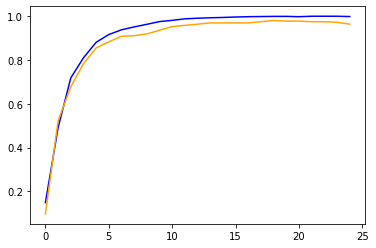

In [79]:
fig, ax = plt.subplots()
ax.plot(range(len(train_acc)), train_acc, 'blue')
ax.plot(range(len(val_acc)), val_acc, 'orange')
plt.show()

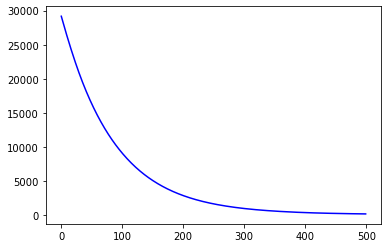

In [80]:
fig, ax = plt.subplots()
ax.plot(range(len(training_loss)), training_loss, 'blue')
plt.show()

In [52]:
y_prob = model.predict(X_test[120:121, :])
y_prob

array([[-0.29403657,  0.96124471,  5.10027817,  2.50012447, -2.19492415,
         0.51891135,  0.13424329,  1.0429014 ,  0.6726052 , -1.43745242]])

In [53]:
np.argmax(y_prob)

2

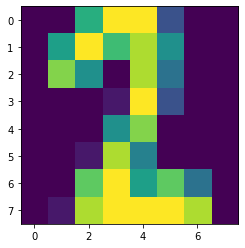

In [54]:
plt.imshow(X_test[120:121, :].reshape(8, 8))

In [249]:
def train(X, y, X_val, y_val, hidden_dim=30, n_class=10, lr=0.1, reg=0.1, n_iter=100):
    n_feature = X.shape[1]
    model = mlcv.TwoLayerNet(n_feature, 30, 10, lr, reg)
    
    training_loss = []
    train_acc = []
    val_acc = []
    
    for i in range(n_iter):
        
        loss, grads = model.loss(X_train, y_train)
        training_loss.append(loss)
                
        for k, grad in grads.items():
            model.params[k] -= lr * grad
        
        if i % 10 == 0:
            y_t = model.loss(X)
            y_v = model.loss(X_val)
            
            t_acc = (np.argmax(y_t, axis=1) == y).mean()
            v_acc = (np.argmax(y_v, axis=1) == y_val).mean()
            train_acc.append(t_acc)
            val_acc.append(v_acc)
            
            print(f'interation i: training loss {loss:.2f}, train acc {t_acc:.2f} val acc {v_acc:.2f}')
            
    return training_loss, train_acc, val_acc
            

In [265]:
train_loss, train_acc, val_acc = train(X_train, y_train, X_test, y_test, lr=0.005, reg=0.6, n_iter=500)

interation i: training loss 49204.38, train acc 0.11 val acc 0.11
interation i: training loss 35466.14, train acc 0.24 val acc 0.25
interation i: training loss 30723.50, train acc 0.37 val acc 0.38
interation i: training loss 26957.03, train acc 0.47 val acc 0.46
interation i: training loss 23765.90, train acc 0.55 val acc 0.52
interation i: training loss 20997.74, train acc 0.59 val acc 0.57
interation i: training loss 18570.71, train acc 0.62 val acc 0.60
interation i: training loss 16434.40, train acc 0.65 val acc 0.64
interation i: training loss 14549.52, train acc 0.68 val acc 0.66
interation i: training loss 12884.19, train acc 0.70 val acc 0.66
interation i: training loss 11411.77, train acc 0.71 val acc 0.68
interation i: training loss 10108.78, train acc 0.72 val acc 0.69
interation i: training loss 8955.36, train acc 0.73 val acc 0.71
interation i: training loss 7934.17, train acc 0.74 val acc 0.72
interation i: training loss 7029.97, train acc 0.76 val acc 0.73
interation i:

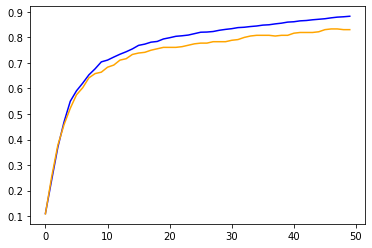

In [266]:
fig, ax = plt.subplots()
ax.plot(range(len(train_acc)), train_acc, 'blue')
ax.plot(range(len(val_acc)), val_acc, 'orange')
plt.show()

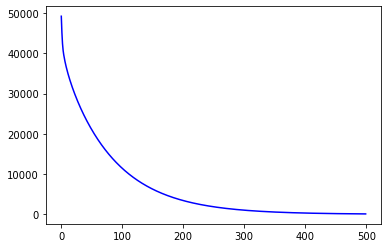

In [267]:
fig, ax = plt.subplots()
ax.plot(range(len(train_loss)), train_loss, 'blue')
plt.show()

In [182]:
(np.argmax(a, axis=1) == y_train).mean()

0.2533054975643702

In [136]:
y_o = model.predict(X_train)

In [137]:
y_o[0,:]

array([0.00000000e+000, 1.36166782e-275, 0.00000000e+000, 0.00000000e+000,
       2.43200046e-186, 0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 1.55245187e-287])

In [138]:
y_train[0]

6

In [133]:
np.argmax(y_o, axis=1)

array([6, 9, 9, ..., 9, 9, 1])

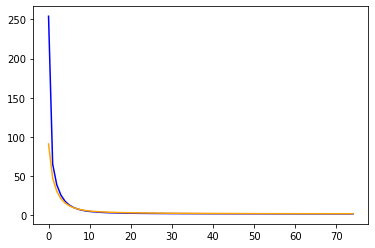

In [136]:
fig, ax = plt.subplots()
ax.plot(range(len(training_loss)), training_loss, 'blue')
ax.plot(range(len(val_loss)), val_loss, 'orange')
plt.show()

In [62]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = mlm.Linear(input_dim, num_hidden)
    self.relu = mlm.ReLU()
    self.linear2 = mlm.Linear(num_hidden, 10)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr, reg):
    self.linear2.update(lr, reg)
    self.linear1.update(lr, reg)

In [116]:
loss = torch.nn
model = Model(n_feature, 30)
y_pred = model(X_train)
loss_value = loss(y_train, y_pred)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1, 0)
y_pred = model(X_train)
loss_value = loss(y_train, y_pred)
print(loss_value)

10288.01961227661
27015.14346470813


In [61]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int, reg: float=0):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y, y_pred)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr, reg)

In [66]:
model = Model(n_feature, 30)
y_p = model(X_train)

In [68]:
y_p.shape

(1437, 10)

In [69]:
loss_t = torch.nn.CrossEntropyLoss()

In [75]:
y_p_t = torch.tensor(y_p, requires_grad=True)
y_t = torch.tensor(y_train)

In [76]:
out = loss_t(y_p_t, y_t)

In [77]:
out

tensor(8491.5285, dtype=torch.float64, grad_fn=<NllLossBackward0>)

In [78]:
out.backward()

In [79]:
y_p_t.grad

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          6.9589e-04,  0.0000e+00],
        [-6.9589e-04,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          6.9589e-04,  0.0000e+00],
        [-6.9589e-04,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          6.9589e-04,  0.0000e+00],
        ...,
        [ 0.0000e+00,  0.0000e+00, -6.9589e-04,  ...,  0.0000e+00,
          1.2534e-84,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -6.9589e-04,
          6.9589e-04,  0.0000e+00],
        [ 6.9589e-04, -6.9589e-04,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]], dtype=torch.float64)

In [80]:
loss = mll.SoftmaxCrossEntropy()

In [83]:
loss.softmax(y_p)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.80119497e-81, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [89]:
o = loss(y_train, y_p)

In [91]:
loss.backward()

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  6.95894224e-04,  0.00000000e+00],
       [-6.95894224e-04,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  6.95894224e-04,  0.00000000e+00],
       [-6.95894224e-04,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  6.95894224e-04,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00, -6.95894224e-04, ...,
         0.00000000e+00,  1.25344118e-84,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -6.95894224e-04,  6.95894224e-04,  0.00000000e+00],
       [ 6.95894224e-04, -6.95894224e-04,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [64]:
fit(X_train, y_train, Model(n_feature, 30), mll.SoftmaxCrossEntropy(), 0.05, 100)

Epoch 0, loss inf
Epoch 1, loss inf
Epoch 2, loss inf
Epoch 3, loss inf
Epoch 4, loss inf
Epoch 5, loss inf
Epoch 6, loss inf
Epoch 7, loss inf
Epoch 8, loss inf
Epoch 9, loss inf
Epoch 10, loss inf
Epoch 11, loss inf
Epoch 12, loss inf
Epoch 13, loss inf
Epoch 14, loss inf
Epoch 15, loss inf
Epoch 16, loss inf
Epoch 17, loss inf
Epoch 18, loss inf
Epoch 19, loss inf
Epoch 20, loss inf
Epoch 21, loss inf
Epoch 22, loss inf
Epoch 23, loss inf
Epoch 24, loss inf
Epoch 25, loss inf
Epoch 26, loss inf
Epoch 27, loss inf
Epoch 28, loss inf
Epoch 29, loss inf
Epoch 30, loss inf
Epoch 31, loss inf
Epoch 32, loss inf
Epoch 33, loss inf
Epoch 34, loss inf
Epoch 35, loss inf
Epoch 36, loss inf
Epoch 37, loss inf
Epoch 38, loss inf
Epoch 39, loss inf
Epoch 40, loss inf
Epoch 41, loss inf
Epoch 42, loss inf
Epoch 43, loss inf
Epoch 44, loss inf
Epoch 45, loss inf
Epoch 46, loss inf
Epoch 47, loss inf
Epoch 48, loss inf
Epoch 49, loss inf
Epoch 50, loss inf
Epoch 51, loss inf
Epoch 52, loss inf
Epo

/home/jing/notebooks/ML-Projects/ml_basics/ml/losses.py:55: RuntimeWarning: divide by zero encountered in log
  return -np.log(self.softmax_y_pred[np.arange(n_sample), y]).sum() / n_sample


#### pytorch